In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from itertools import groupby
from operator import itemgetter
import dataProcessing
import scipy
import os

utills = dataProcessing.Utills()
path = os.getcwd()[0:-3] + 'DataSet/'

File name has a correct format!


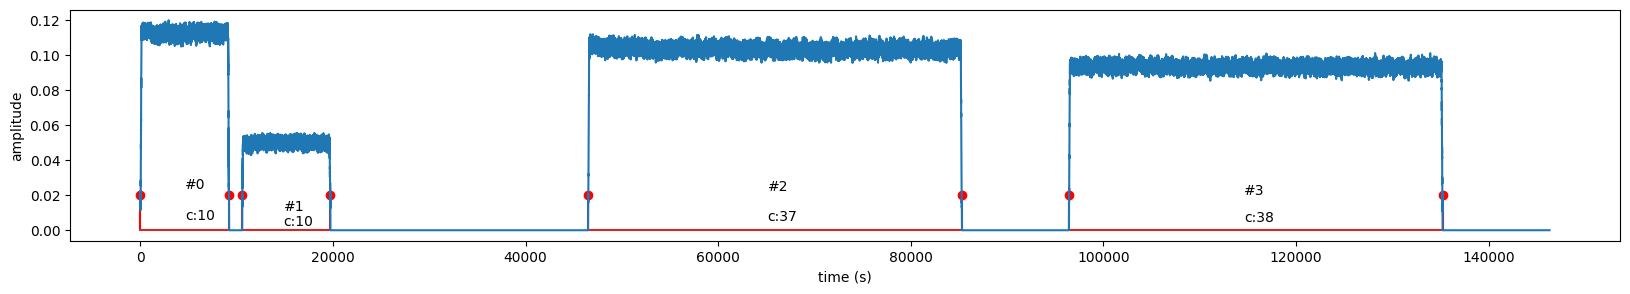

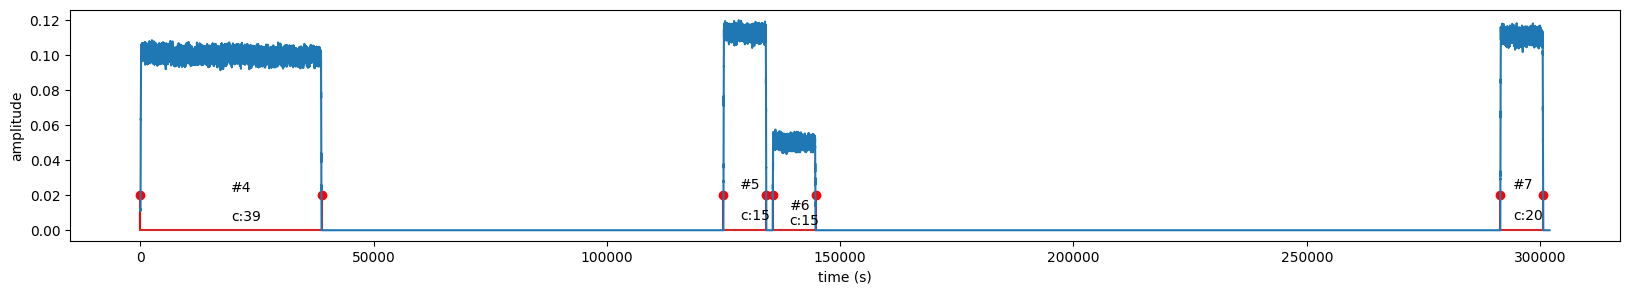

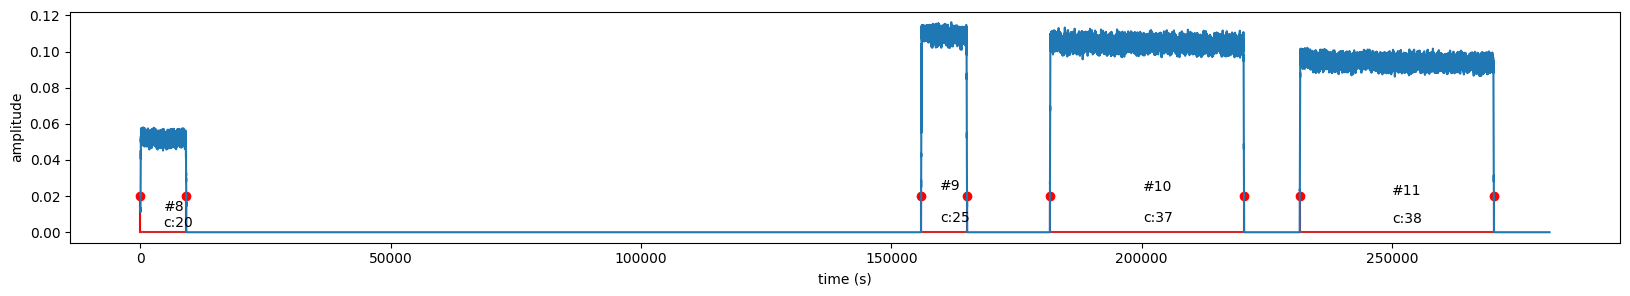

In [2]:
# test

chnl2 = path + 'SDR_2/offBody/high-tx-PWR-9dbm/x310-jan-14-dvc-1-pos-1_2440000000.0_100000000.0_31.5_2_1_1.iq'
IQdatas1,tindx1 = utills.readFile(chnl2,Fc=2440000000.0 - 190000)

utills.plotter(IQdatas1,tindx1,4,10,info = 1,fft =0,compression_ratio = 10)

In [5]:

target = 'SDR_2/offBody/high-tx-PWR-9dbm/'
for x in os.scandir(path+target):
    if os.path.splitext(x)[1] != '.iq':
        continue
    temp = os.path.splitext(x)[0]+os.path.splitext(x)[1]
    IQdatas,tindx = utills.readFile(temp,Fc=2440000000.0 - 190000)
    metaData = {}
    for frame_nr in range(IQdatas.len):
        cnt = 0
        for meta in ['SDR', 'test','txPower']:
            metaData[meta] = temp.split('_')[3].split('/')[cnt]
            cnt+=1
        metaData['date'] = temp.split('_')[3].split('/')[-1].split('-')[1] + '-' + temp.split('_')[3].split('/')[-1].split('-')[2]
        metaData['dvc'] = temp.split('_')[3].split('/')[-1].split('-')[4]
        metaData['pos'] = temp.split('_')[3].split('/')[-1].split('-')[6]
        metaData['antenna'] = temp.split('/')[-1].split('_')[-1].split('.')[0]
        metaData['frame_nr'] = frame_nr
        metaData['frame'] = IQdatas.frameByNumber(frame_nr)
        metaData['frameTime'] = IQdatas.tindx[frame_nr]
        metaData['lenFrame'] = len(metaData['frame'])

        
    

File name has a correct format!
{'SDR': '2', 'test': 'offBody', 'txPower': 'high-tx-PWR-9dbm', 'date': 'jan-14', 'dvc': '2', 'pos': '3', 'antenna': '2', 'frame_nr': 0, 'frame': array([-0.01098666-0.00018311j,  0.00863674-0.00634785j,
        0.00064089+0.01358074j, ...,  0.00204474+0.01266518j,
       -0.00994903-0.00756859j,  0.01089511-0.00231941j], dtype=complex64), 'frameTime': array([899781., 908965.]), 'lenFrame': 9183}
{'SDR': '2', 'test': 'offBody', 'txPower': 'high-tx-PWR-9dbm', 'date': 'jan-14', 'dvc': '2', 'pos': '3', 'antenna': '2', 'frame_nr': 1, 'frame': array([-0.00958281+0.00393689j,  0.00585955-0.00930815j,
        0.00250252+0.0118717j , ..., -0.00854518+0.00930815j,
        0.00073244-0.01333659j,  0.00997955+0.00558489j], dtype=complex64), 'frameTime': array([922656., 931855.]), 'lenFrame': 9198}
{'SDR': '2', 'test': 'offBody', 'txPower': 'high-tx-PWR-9dbm', 'date': 'jan-14', 'dvc': '2', 'pos': '3', 'antenna': '2', 'frame_nr': 2, 'frame': array([ 0.00637837+0.010650

TypeError: IQdata.__init__() missing 1 required positional argument: 'tindx'

In [ ]:
for i in range(2):
    print(i+1)
    chnl1 = 'FDATA/SDR_1/onBody/iter_1/x310-jan-14-HighPower-dvc-'+str(i+1)+'-pos-moving_2440000000.0_100000000.0_31.5_2_1_1.iq'
    IQdatas1,tindx1 = utills.readFile(chnl1,Fc=2440000000.0 - 190000)
    chnl2 = 'FDATA/SDR_1/onBody/iter_1/x310-jan-14-HighPower-dvc-'+str(i+1)+'-pos-moving_2440000000.0_100000000.0_31.5_2_1_2.iq'
    IQdatas2,tindx2 = utills.readFile(chnl2,Fc=2440000000.0 - 190000)
    # utills.plotter(IQdatas1,tindx1,10,40,info = 1,fft = 0)
    utills.plotter(IQdatas2,tindx2,10,100,info = 1,fft = 0)

In [30]:
def pltplot(i,IQdatas):
    demod, phase = IQdatas.demodAndPhase(i)
    t= np.linspace(.01,1,60) # has to be automated eventually 
    lpf = np.sin(t)/t
    bin,res = IQdatas.decode(i,signal=[1070,-30],bitSamplePeriod = 88,plot = 0,lpf = lpf)
    if res[2:4] != 'aa' and res[2:4]!= '55' or IQdatas.channelDetection(i) in [37,38,39] :
        # return
        x=0
    # return
    bin,res = IQdatas.decode(i,signal=[1070,-30],bitSamplePeriod = 88,plot = 0,lpf = lpf)
    print(res)
    plt.figure(figsize=(20, 6), dpi=100)
    plt.subplot(3,1,1)
    plt.plot(np.abs(np.convolve(lpf,demod))[0:-30])
    plt.subplot(3,1,2)
    plt.plot(phase[0:-30])
    plt.suptitle("frame " + str(i) +": "+res)
    # plt.show()
    plt.close()
    return res

for i in range(0,50):
    print("########## " + str(i) + " ###############")
    try:
        res = pltplot(i,IQdatas=IQdatas1)
    except:
        continue
    # pltplot(i,IQdatas=IQdatas2)


########## 0 ###############
0x5523733364e98381150a0
########## 1 ###############
0x5523733364c9834a7505
########## 2 ###############
0x556b7d9171b1efb2cb1b12f40eee0ce872f94cd5cdaedb955be9422cc9d495d3b770efcef767825296b0606aca98d1
########## 3 ###############
0x556b7d91716b077a4a3d8c15f2982595224ed0790c1b0a0459a47ff7989c63948b0feb4bba0610b849150df69da03b1
########## 4 ###############
0x556b7d9171f8100ab40398ab5d87d7868510e2c634f6539697495a49863d7c1d7d40e0cec00e59b56309179a2f4e0
########## 5 ###############
0x55237333646e1f8304bf1
########## 6 ###############
0x55237333644e1f4864bf1
########## 7 ###############
0x55237333649faafc45bd
########## 8 ###############
0x5523733364bfaa3725bd1
########## 9 ###############
0x55237333640a5f104bcf1
########## 10 ###############
0x556b7d9171b1efb2cb1b12f40eee0ce872f94cd5cdaedb955be9422cc9d495d3b770efcef767825296b0606aca98d20
########## 11 ###############
0x556b7d91716b077a4a3d8c15f2982595224ed0790c1b0a0459a47ff7989c63948b0feb4bba0610b849150df69da03

In [ ]:
# utills.plotter(IQdata=IQdatas1, batch=10,frameShowLimit=10,fft=1)
# len(IQdatas1.TotalFramesIndex)



In [ ]:
# def pisWizLR(phaseUnwrapped, nr_lines):
#     t = np.linspace(0,len(phaseUnwrapped),len(phaseUnwrapped))
#     myPWLF = pwlf.PiecewiseLinFit(t, phaseUnwrapped)
#     breakpoints = myPWLF.fit(nr_lines)
#     return myPWLF, breakpoints, myPWLF.predict(t)


In [ ]:
def reconstructor(frame,Fc = None, Fs = None):

        if Fc is None:
            Fc = 2.444e9
        if Fs is None:
            Fs = 200e6
        n = np.linspace(0,len(frame)/Fs,len(frame))
        cos = np.real(frame)*np.sin(Fc * n / Fs)
        sin = np.imag(frame)*np.cos(Fc * n / Fs)
        return cos + sin

for i in range(20):
    x= IQdatas.reconstructor(IQdatas.demodulator(0),2.344e9+i*100e6)
    plt.plot(x)
    plt.show()

In [ ]:
x=  np.linspace(1,1.5,4)
y= np.array([2,3,4,5])
x*y

In [ ]:
chnl = 38
def comprator2(datas,chnl):
    devices = []
    i = 0
    # len(data.TotalFramesIndex)
    for data in datas:
        devices.extend([(x,i) for x in range(20) if  data.channelDetection(x)== chnl])
        i+=1  
    pairs = itertools.combinations(devices,2)
    desCombination = [pair for pair in pairs if pair[0][1] != pair[1][1]]
    for com in desCombination:

            frame1 = datas[com[0][1]].frameAdjuster(com[0][0])
            frame2 = datas[com[1][1]].frameAdjuster(com[1][0])


            phase = np.arctan2(np.imag(frame1),np.real(frame1))
            phase  = phaseUnwrapper(phase,True)[0]
            
            # detecting the begining of the frame keeping the good ones
            temp,slp,b = slpCorrection(phase[20:280].copy())
            #temp,slp,b = slpCorrection(phase[700:1100].copy())
            if np.abs(max(temp) - min(temp))>1:
                continue

            phase = np.arctan2(np.imag(frame2),np.real(frame2))
            phase  = phaseUnwrapper(phase,True)[0]
            
            # detecting the begining of the frame keeping the good ones
            temp,slp,b = slpCorrection(phase[20:280].copy())
            #temp,slp,b = slpCorrection(phase[700:1100].copy())
            if np.abs(max(temp) - min(temp))>1:
                continue


            temp = frame_subtractor(frame1, frame2, offSet=0)
            # temp = frame_subtractor(np.abs(frame1), np.abs(frame2), offSet=0)
            print(len(temp))

            famp = open("TSM/"+str(com[0])+" - "+str(com[1]) + " amplitude at chnl "+ str(chnl)+ ".tsm",'w+')
            for i in range(len(temp)//10-1):
                famp.write(str(np.abs(temp[i*10]))+'\n')
            famp.close()
            fig= plt.figure(figsize=(20,3),dpi = 100)
            plt.plot(np.abs(temp))
            plt.title(str(com[0])+" - "+str(com[1]) + "amplitude @ chnl: "+ str(chnl))
            plt.show()
            plt.close()


            # temp = frame_subtractor(np.angle(frame1), np.angle(frame2), offSet=0)

            fph = open("TSM/"+str(com[0])+" - "+str(com[1]) + " phase at chnl "+ str(chnl)+ ".tsm",'w+')
            for i in range(len(temp)//10 -1):
                fph.write(str(np.angle(temp[i*10]))+'\n')
            fph.close()
            

            
            
            fig= plt.figure(figsize=(20,3),dpi = 100)
            plt.plot(np.angle(temp))
            plt.title(str(com[0])+" - "+str(com[1]) + "phase @ chnl: "+ str(chnl))
            plt.show()
            plt.close()

comprator2(datas,chnl)

In [ ]:

def slpPlotter(slp,b):
    plt.figure(figsize=(20, 6), dpi=100)
    plt.subplot(2,1,1)
    xx = slp[slp>0]-np.average(slp[slp>0])
    plt.stem(xx)
    # plt.title("slp")
    # plt.subplot(2,1,2)
    # plt.stem(b[slp>0]-np.average(b[slp>0]))
    # plt.title("intercept")
    plt.title("chnl 37 - STD: " + str(np.std(xx)))
    # plt.figure(figsize=(40, 6), dpi=100)
    plt.subplot(2,1,2)
    yy = slp[slp<0]-np.average(slp[slp<0])
    plt.stem(yy)
    # plt.title("slp")
    # plt.subplot(2,1,2)
    # plt.stem(b[slp<0]-np.average(b[slp<0]))
    # plt.title("intercept")
    plt.title("chnl 38 - STD: "+ str(np.std(yy)))
    plt.show()
    return np.std(xx),np.std(yy)
i= 0
for x in datas:
    slp = demodPlotter(data=x, frameLimit= 16000)
    slp_x = list(zip(*slp))

    slp = np.array(slp_x[0])
    b = np.array(slp_x[1])
    print(files[i])
    slpPlotter(slp,b)
    i+=1